# Imports 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer #used for weighting the words in doc eg:From has low weight
#Words like criminal have high weights
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix

# Gathering the data

In [61]:
data = fetch_20newsgroups()

In [62]:
categories = ['alt.atheism',
   'comp.graphics',
   'comp.os.ms-windows.misc',
   'comp.sys.ibm.pc.hardware',
   'comp.sys.mac.hardware',
   'comp.windows.x',
   'misc.forsale',
   'rec.autos',
   'rec.motorcycles',
   'rec.sport.baseball',
   'rec.sport.hockey',
   'sci.crypt',
   'sci.electronics',
   'sci.med',
   'sci.space',
   'soc.religion.christian',
   'talk.politics.guns',
   'talk.politics.mideast',
   'talk.politics.misc',
   'talk.religion.misc'] 

train = fetch_20newsgroups(subset='train',categories=categories)

test = fetch_20newsgroups(subset='test',categories=categories)

# Creating the model

In [64]:
#TfidfVectorizer collects all the Training data and adds weights to the words , MultinomialNB is used to map the 
#results from Vectorizer with Target values.
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels = model.predict(test.data)

# Creating the confusion matrix

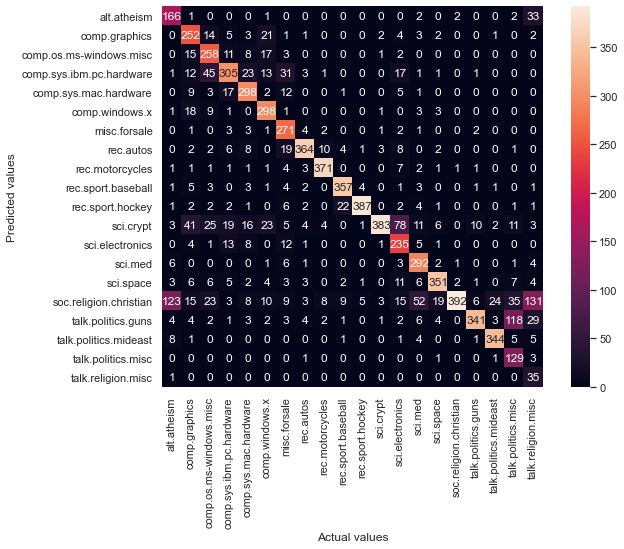

In [65]:
plt.figure(figsize=(10,7))
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=True,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# Predicting the category

In [66]:
def predict_category(s,train=train,model=model):
    prediction = model.predict([s])
    value = prediction[0]
    return train.target_names[value]

# Execution

In [71]:
Text = input('Enter the News Headline :')
predict_category(Text)

Enter the News Headline :Cheap price and great discount!


'misc.forsale'